In [20]:
%matplotlib inline

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
#levantamos los csv

station = pd.read_csv('station.csv', low_memory=False)
trip_test = pd.read_csv('trip_test.csv', low_memory=False)
trip_train = pd.read_csv('trip_train.csv', low_memory=False)
weather = pd.read_csv('weather.csv', low_memory=False)

In [3]:
status = pd.read_csv('status.csv', low_memory=True)

In [4]:
#vemos un poco los dataframes de cada csv
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [5]:
status.head()

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01


In [6]:
trip_train.head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,907649,396,8/27/2015 8:36,Harry Bridges Plaza (Ferry Building),50,8/27/2015 8:43,Embarcadero at Sansome,60,187,Subscriber,94602
1,384043,636,7/28/2014 22:06,Market at 10th,67,7/28/2014 22:17,Washington at Kearny,46,417,Subscriber,94133
2,316176,334,6/9/2014 8:42,Market at Sansome,77,6/9/2014 8:47,2nd at Folsom,62,281,Subscriber,94107
3,618874,666,1/26/2015 16:55,San Francisco Caltrain 2 (330 Townsend),69,1/26/2015 17:07,Temporary Transbay Terminal (Howard at Beale),55,634,Subscriber,94602
4,910977,318,8/29/2015 15:09,Market at 10th,67,8/29/2015 15:14,Powell Street BART,39,607,Subscriber,94709
5,522083,337,10/30/2014 7:00,Townsend at 7th,65,10/30/2014 7:06,San Francisco Caltrain (Townsend at 4th),70,370,Subscriber,94107
6,880809,394,8/7/2015 17:11,2nd at South Park,64,8/7/2015 17:17,2nd at Townsend,61,443,Subscriber,94107
7,488938,766,10/8/2014 14:10,Powell at Post (Union Square),71,10/8/2014 14:23,San Francisco Caltrain (Townsend at 4th),70,485,Subscriber,94107
8,899522,531,8/21/2015 7:53,2nd at Folsom,62,8/21/2015 8:02,San Francisco Caltrain (Townsend at 4th),70,603,Subscriber,94549
9,737380,267,4/23/2015 6:36,Market at 4th,76,4/23/2015 6:40,Mechanics Plaza (Market at Battery),75,86,Customer,21202


In [7]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [8]:
#vemos de que años son los registros   (2013, 2014,2015)  tal vez lo dice en kaggle pero por las dudas

print(trip_train['start_date'].str.contains('2011').value_counts())
print(trip_train['start_date'].str.contains('2012').value_counts())
print(trip_train['start_date'].str.contains('2013').value_counts())
print(trip_train['start_date'].str.contains('2014').value_counts())
print(trip_train['start_date'].str.contains('2015').value_counts())
print(trip_train['start_date'].str.contains('2016').value_counts())


False    549961
Name: start_date, dtype: int64
False    549961
Name: start_date, dtype: int64
False    467456
True      82505
Name: start_date, dtype: int64
False    282071
True     267890
Name: start_date, dtype: int64
False    350395
True     199566
Name: start_date, dtype: int64
False    549961
Name: start_date, dtype: int64


In [5]:
#promedio de duracion de viajes para cada año

sum = 0
count = trip_train[trip_train['start_date'].str.contains('2013')]['duration'].count()
idx =  (trip_train[trip_train['start_date'].str.contains('2013')])['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['start_date'].str.contains('2013')]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAnio2013 = sum / count

sum = 0
count = trip_train[trip_train['start_date'].str.contains('2014')]['duration'].count()
idx =  (trip_train[trip_train['start_date'].str.contains('2014')])['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['start_date'].str.contains('2014')]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAnio2014 = sum / count

sum = 0
count = trip_train[trip_train['start_date'].str.contains('2015')]['duration'].count()
idx =  (trip_train[trip_train['start_date'].str.contains('2015')])['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['start_date'].str.contains('2015')]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAnio2015 = sum / count

print(promedioAnio2013)
print(promedioAnio2014)
print(promedioAnio2015)

1318.468008
1142.30936952
989.85579708


<IPython.core.display.Javascript object>


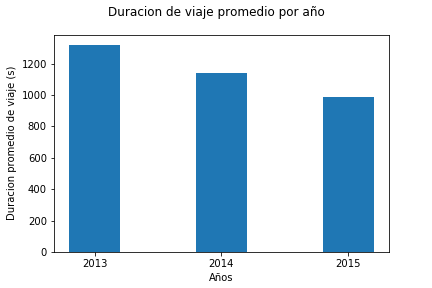

In [29]:
#graficamos el prmedio por año de duracion de viajes 
%matplotlib notebook
promediosAnios = [promedioAnio2013, promedioAnio2014, promedioAnio2015]
anios = [2013,2014,2015]
plt.bar(anios, promediosAnios, width = 0.4)
plt.suptitle("Duracion de viaje promedio por año")
plt.xlabel("Años")
plt.ylabel("Duracion promedio de viaje (s)")
plt.xticks(anios, ['2013','2014', '2015'])
plt.show()


In [15]:
#analizamos en que influye el ser costumer o subscriber respecto al uso de bicis o duration de viaje

trip_train['subscription_type'].value_counts()



Subscriber    465377
Customer       84584
Name: subscription_type, dtype: int64

In [16]:
sum = 0
count = trip_train[trip_train['subscription_type'] == 'Subscriber']['duration'].count()
idx =  trip_train[trip_train['subscription_type'] == 'Subscriber']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['subscription_type'] == 'Subscriber']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSubscriber = sum / count

sum = 0
count = trip_train[trip_train['subscription_type'] == 'Customer']['duration'].count()
idx =  trip_train[trip_train['subscription_type'] == 'Customer']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['subscription_type'] == 'Customer']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioCustomer = sum / count

#tla vez aca alla problema de la ecuacion de moivre 
print(promedioSubscriber)
print(promedioCustomer)

588.251312377
4002.84203868


In [13]:
#graficamos la distribucion de la duracion de los viajes por año y entre los 3 
#%matplotlib notebook
#duration = trip_train[pd.to_numeric(trip_train.duration, errors = 'coerce').notnull()]['duration'].value_counts()
#idx = duration.index.tolist()

#plt.plot(duration)





In [17]:
#calculamos duracion promedio por dia de semana

#separamos la fecha por / y eliminamos todo lo q hay mas a la derecha del espacio despues del año
fechas = trip_train['start_date'].map(lambda x: (x.split('/')[0], x.split('/')[1], x.split('/')[2].split(' ')[0]))

#convertimos cada tupla de año mes dia a dia de semana ylo guardamos en un nuevo campo 
trip_train['weekday'] = fechas.map(lambda x: dt.date(int(x[2]),int(x[0]),int(x[1])).strftime("%A"))


<IPython.core.display.Javascript object>


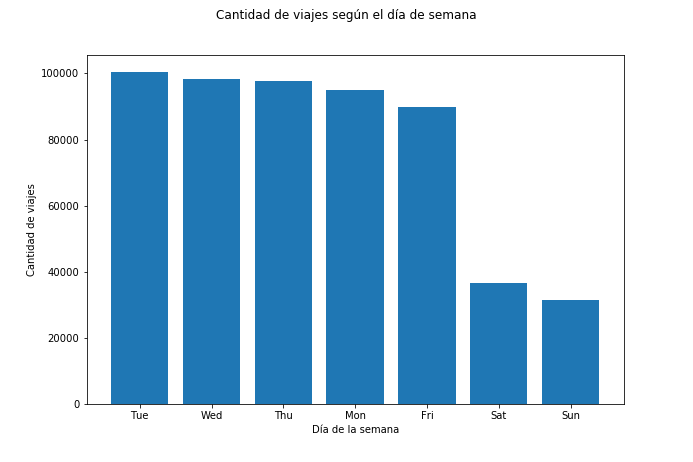

In [26]:
#grafico de viajes q se realizan cada dia de semana 
%matplotlib notebook

weekday_count = trip_train['weekday'].value_counts()
number = [0,1,2,3,4,5,6]
dias = ['Tue', 'Wed', 'Thu', 'Mon', 'Fri', 'Sat', 'Sun']
plt.bar(number, weekday_count)
plt.suptitle("Cantidad de viajes según el día de semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de viajes")
plt.xticks(number, dias)
plt.show()

In [25]:
#duracion por dia de semana


sum = 0
count = trip_train[trip_train['weekday'] == 'Monday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Monday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Monday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioLunes = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Tuesday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Tuesday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Tuesday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMartes = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Wednesday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Wednesday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Wednesday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMiercoles = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Thursday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Thursday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Thursday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioJueves = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Friday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Friday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Friday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioViernes = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Saturday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Saturday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Saturday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSabado = sum / count

sum = 0
count = trip_train[trip_train['weekday'] == 'Sunday']['duration'].count()
idx =  trip_train[trip_train['weekday'] == 'Sunday']['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['weekday'] == 'Sunday']['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioDomingo = sum / count
                       
print(promedioLunes)
print(promedioMartes)
print(promedioMiercoles)
print(promedioJueves)
print(promedioViernes)
print(promedioSabado)
print(promedioDomingo)             #habria q chequear estos datos al parecer los findes se viaja mas q el dia de semana. 
                                   #aunq tendria sentido pensando que en la semana se usa mucho para trabajar y el finde para pasear
                                   #y el viernes es mas alto porq se junta trabajo y un poquito de paseo
                       

845.199636241
813.614938751
823.866086762
879.890210842
1050.24347439
2935.45892367
2557.49631177


<IPython.core.display.Javascript object>


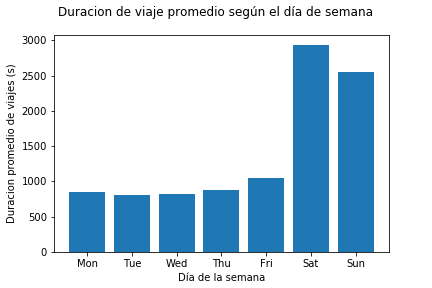

In [28]:
#graficamos los promedios de arriba 
%matplotlib notebook
promediosDias = [promedioLunes, promedioMartes, promedioMiercoles, promedioJueves, promedioViernes, promedioSabado, promedioDomingo]
number = [0,1,2,3,4,5,6]
dias = [ 'Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']
plt.bar(number, promediosDias)
plt.suptitle("Duracion de viaje promedio según el día de semana")
plt.xlabel("Día de la semana")
plt.ylabel("Duracion promedio de viajes (s)")
plt.xticks(number, dias)
plt.show()

In [40]:
#status[(status['docks_available'] == 0)]['station_id'].value_counts()

In [30]:
cantidadVecesConCeroBikesDisponibles = [1] * station['id'].size
j = 0
for stationId in status['station_id'].unique():
    statusConId = status[status['station_id'] == stationId]
    cantidadVecesConCeroBikesDisponibles[j] = statusConId[statusConId['bikes_available'] == 0]['station_id'].count()
    j = j + 1

station['cantidad_veces_cero_bikes_disponibles'] = cantidadVecesConCeroBikesDisponibles

cantidadVecesConCeroDocksDisponibles = [1] * station['id'].size
j = 0
for stationId in status['station_id'].unique():
    statusConId = status[status['station_id'] == stationId]
    cantidadVecesConCeroDocksDisponibles[j] = statusConId[statusConId['docks_available'] == 0]['station_id'].count()
    j = j + 1

station['cantidad_veces_cero_docks_disponibles'] = cantidadVecesConCeroDocksDisponibles


In [31]:
promedioBikesAvailable = [1] * station['id'].size
j = 0
for stationId in status['station_id'].unique():
    sum = 0
    count = status[status['station_id'] == stationId]['bikes_available'].count()
    idx =  status[status['station_id'] == stationId]['bikes_available'].value_counts().index.tolist()
    i = 0
    availability = status[status['station_id'] == stationId]['bikes_available'].value_counts()
    for bikesAvailable in availability:
        sum += idx[i] * bikesAvailable
        i += 1
    promedioBikesAvailable[j] = round(sum/count , 2)
    j = j + 1
station['promedio_bikes_available'] = promedioBikesAvailable


promedioDocksAvailable = [1] * station['id'].size
j = 0
for stationId in status['station_id'].unique():
    sum = 0
    count = status[status['station_id'] == stationId]['docks_available'].count()
    idx =  status[status['station_id'] == stationId]['docks_available'].value_counts().index.tolist()
    i = 0
    availability = status[status['station_id'] == stationId]['docks_available'].value_counts()
    for docksAvailable in availability:
        sum += idx[i] * docksAvailable
        i += 1
    promedioDocksAvailable[j] = round(sum/count , 2)
    j = j + 1
station['promedio_docks_available'] = promedioDocksAvailable


In [157]:
station.head()

,id,name,lat,long,dock_count,city,installation_date,promedio_bikes_available,promedio_docks_available,cantidad_veces_cero_bikes_disponibles,cantidad_veces_cero_docks_disponibles
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,13.17,13.76,1340,466
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,8.46,6.53,1066,4817
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,5.29,5.69,10618,6614
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,8.11,10.87,1321,0
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,7.61,7.38,3564,3633


<IPython.core.display.Javascript object>


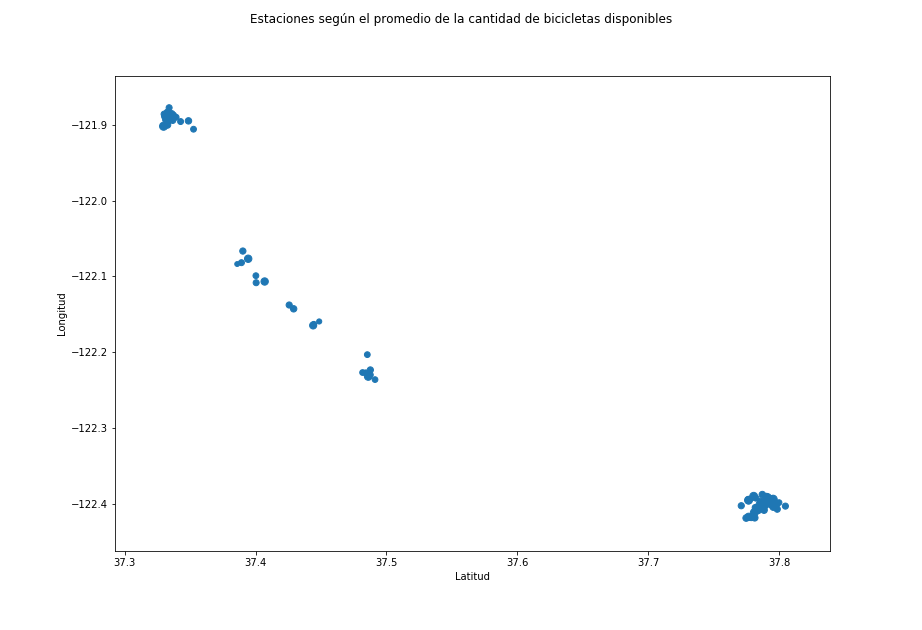

In [32]:
#grafico de todas las estaciones con radiosegun el promedio de las bicicletas disponibles

#mejorar los colores, creando una distancia entre cero y uno 

%matplotlib notebook

plt.scatter(station['lat'], station['long'], s=station['promedio_bikes_available']*5)

plt.suptitle("Estaciones según el promedio de la cantidad de bicicletas disponibles")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


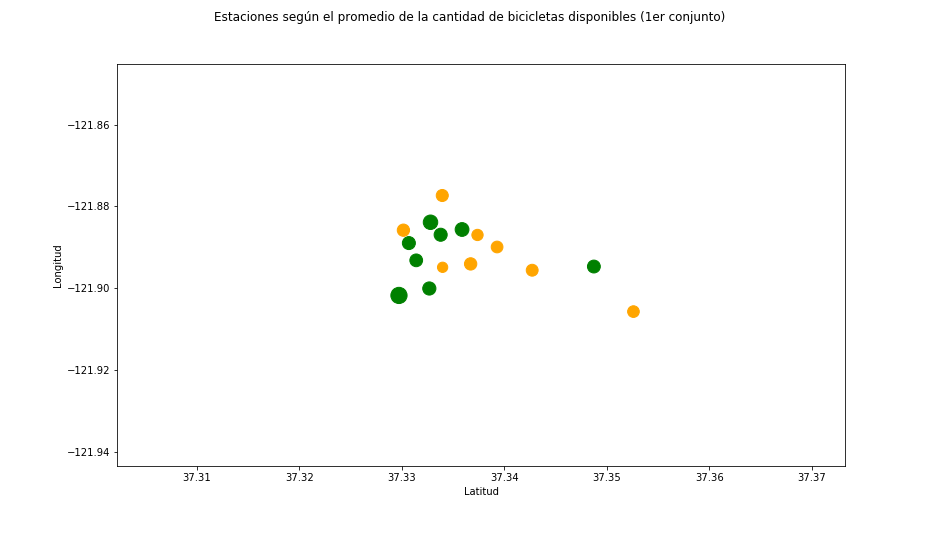

In [33]:
#grafico de todas las estaciones del primer conjunto

#suponemos un criterio para poca, media y mucha cantidad de bicis disponibles

%matplotlib notebook

lat37 = station[station['lat'] < 37.37]

colors = ["" for x in range(lat37['promedio_bikes_available'].size)]
i = 0
for line in lat37['promedio_bikes_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1
plt.scatter(lat37['lat'], lat37['long'], s=lat37['promedio_bikes_available']*20, c = colors )

plt.suptitle("Estaciones según el promedio de la cantidad de bicicletas disponibles (1er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()
#aregar q si son de un radio menor a x , sean de otro color. tres colores distintos. poco, medio y mucha disponibilidad

<IPython.core.display.Javascript object>


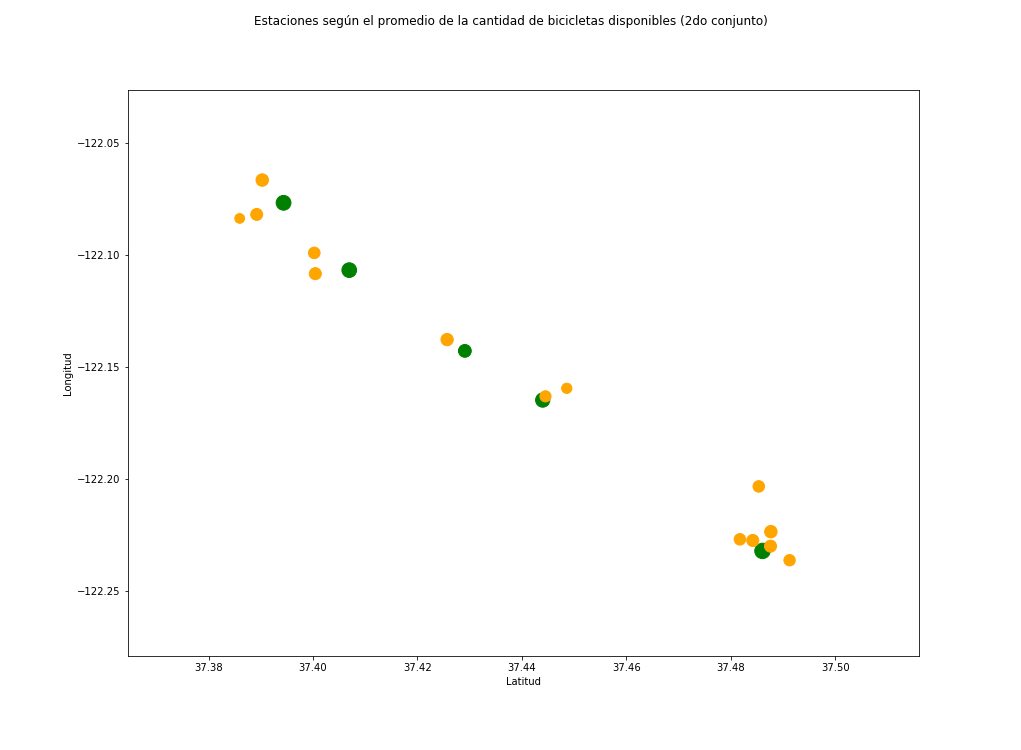

In [35]:
#grafico de todas las estaciones del segundo conjunto

%matplotlib notebook

lat36 = station[(station['lat'] > 37.37) & (station['lat'] < 37.75)]
colors = ["" for x in range(lat36['promedio_bikes_available'].size)]
i = 0
for line in lat36['promedio_bikes_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1

plt.scatter(lat36['lat'], lat36['long'], s=lat36['promedio_bikes_available']*20, c = colors)
plt.suptitle("Estaciones según el promedio de la cantidad de bicicletas disponibles (2do conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


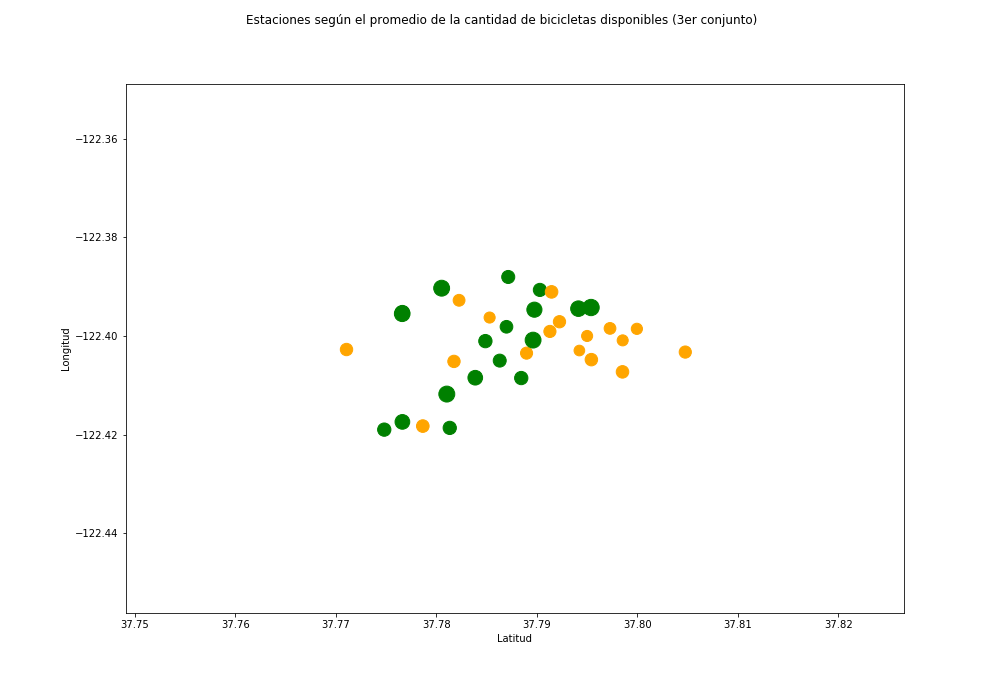

In [36]:
#grafico de todas las estaciones del tercer conjunto

%matplotlib notebook

lat75 = station[station['lat'] > 37.75]
colors = ["" for x in range(lat75['promedio_bikes_available'].size)]
i = 0
for line in lat75['promedio_bikes_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1

plt.scatter(lat75['lat'], lat75['long'], s=lat75['promedio_bikes_available']*20, c = colors)
plt.suptitle("Estaciones según el promedio de la cantidad de bicicletas disponibles (3er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


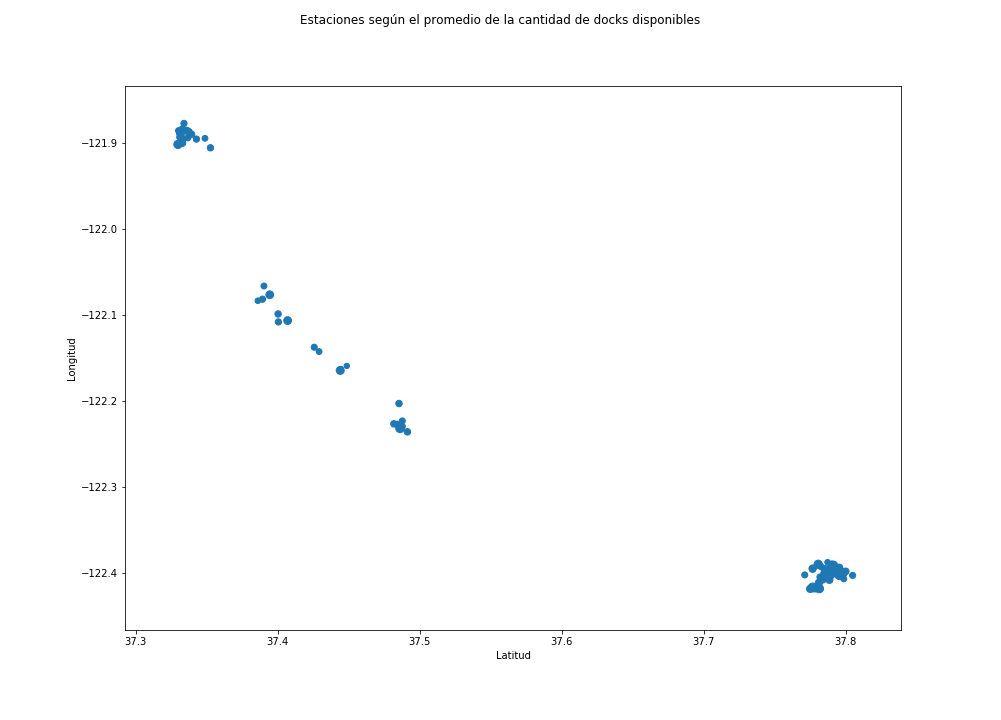

In [38]:
#grafico de todas las estaciones con radio segun el promedio de los docks disponibles

#falta emprolijarlos. agregar labels titulos

%matplotlib notebook

plt.scatter(station['lat'], station['long'], s=station['promedio_docks_available']*5)
plt.suptitle("Estaciones según el promedio de la cantidad de docks disponibles")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


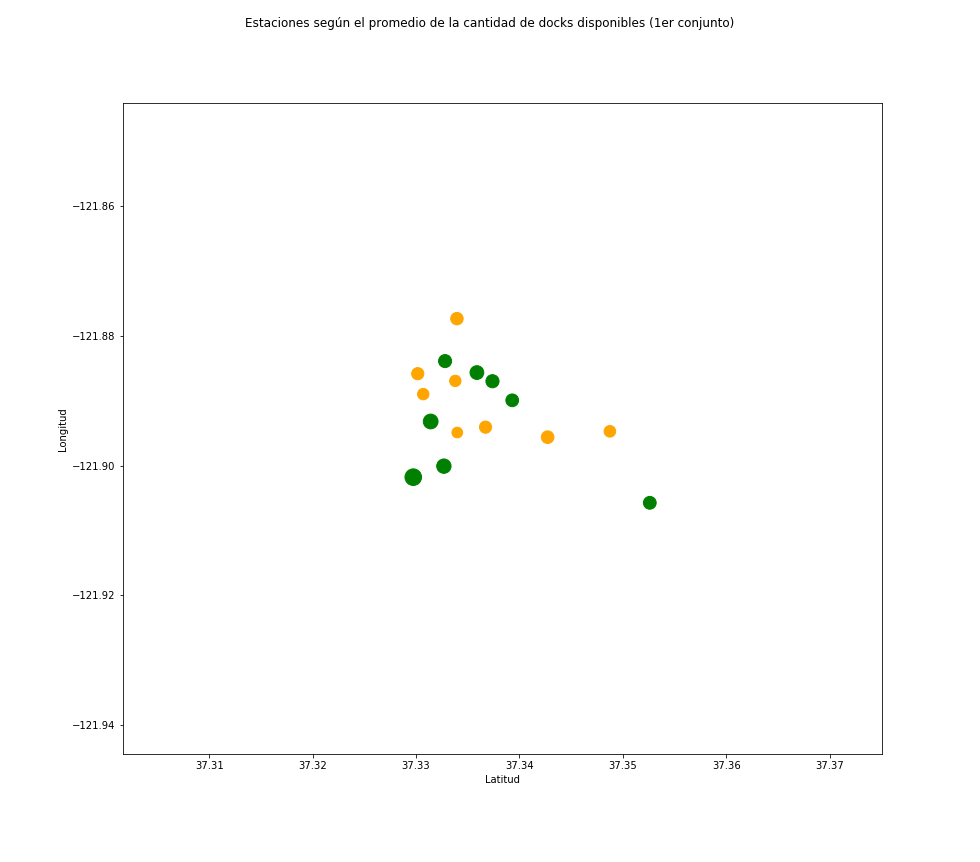

In [39]:
#grafico de todas las estaciones del primer conjunto

%matplotlib notebook

lat37 = station[station['lat'] < 37.37]
colors = ["" for x in range(lat37['promedio_docks_available'].size)]
i = 0
for line in lat37['promedio_docks_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1

plt.scatter(lat37['lat'], lat37['long'], s=lat37['promedio_docks_available']*20, c = colors)
plt.suptitle("Estaciones según el promedio de la cantidad de docks disponibles (1er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


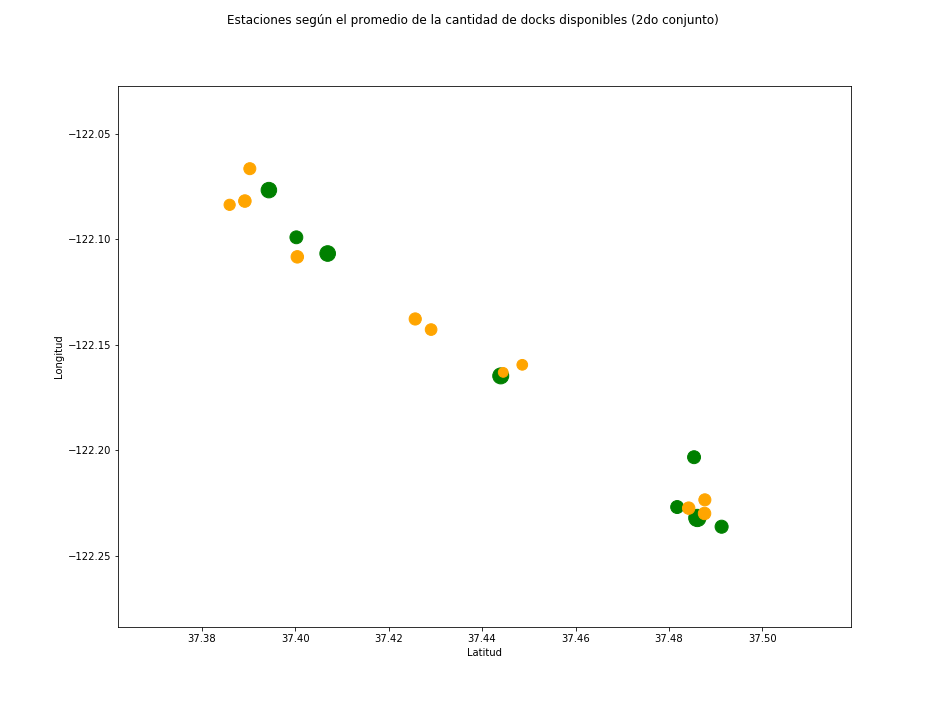

In [40]:
#grafico de todas las estaciones del segundo conjunto

%matplotlib notebook

lat36 = station[(station['lat'] > 37.37) & (station['lat'] < 37.75)]
colors = ["" for x in range(lat36['promedio_docks_available'].size)]
i = 0
for line in lat36['promedio_docks_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1

plt.scatter(lat36['lat'], lat36['long'], s=lat36['promedio_docks_available']*20, c = colors)
plt.suptitle("Estaciones según el promedio de la cantidad de docks disponibles (2do conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


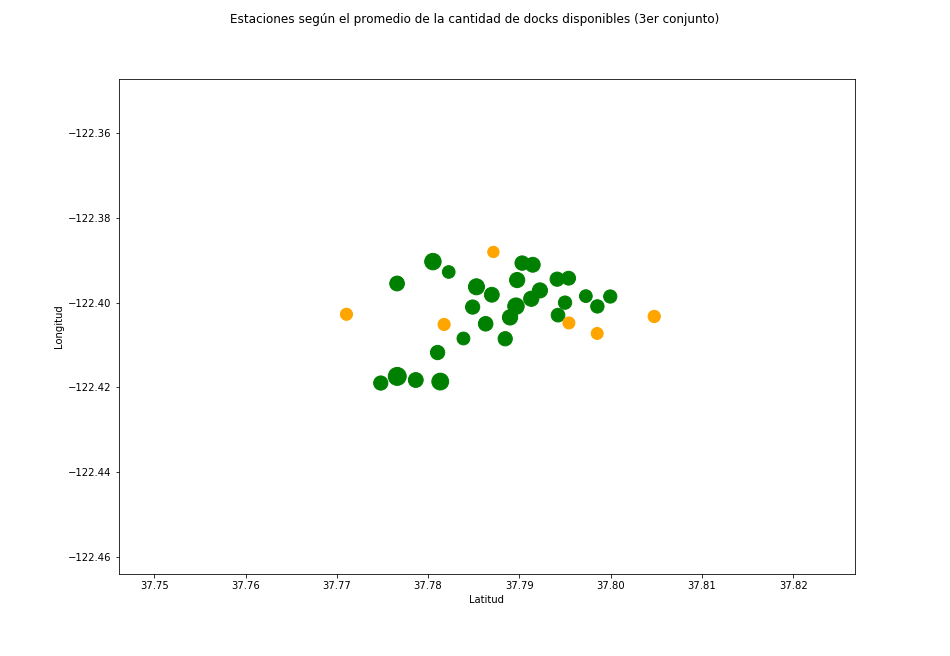

In [41]:
#grafico de todas las estaciones del tercer conjunto

%matplotlib notebook

lat75 = station[station['lat'] > 37.75]
colors = ["" for x in range(lat75['promedio_docks_available'].size)]
i = 0
for line in lat75['promedio_docks_available']:
    if(int(line) < 3):
        colors[i] = 'red'
    elif((int(line) > 3) & (int(line) < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'green'
    i = i +1

plt.scatter(lat75['lat'], lat75['long'], s=lat75['promedio_docks_available']*20, c = colors)
plt.suptitle("Estaciones según el promedio de la cantidad de docks disponibles (3er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


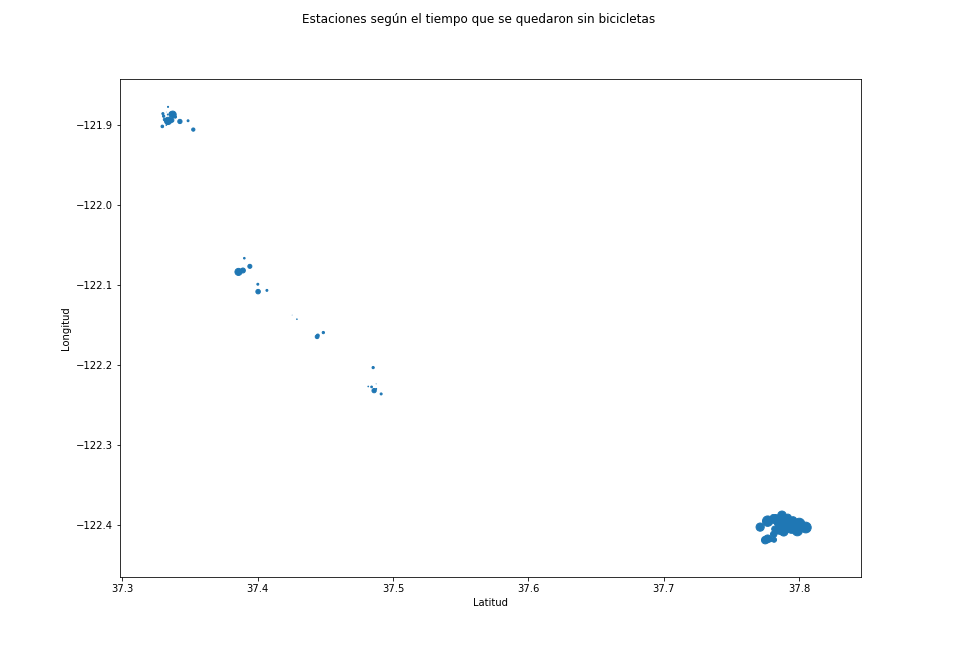

In [43]:
#grafico de todas las estaciones con radio segun cantidad de veces q se quedaron sin bicis
#falta emprolijarlos. agregar labels titulos

%matplotlib notebook

plt.scatter(station['lat'], station['long'], s=station['cantidad_veces_cero_bikes_disponibles']/200)
plt.suptitle("Estaciones según el tiempo que se quedaron sin bicicletas")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


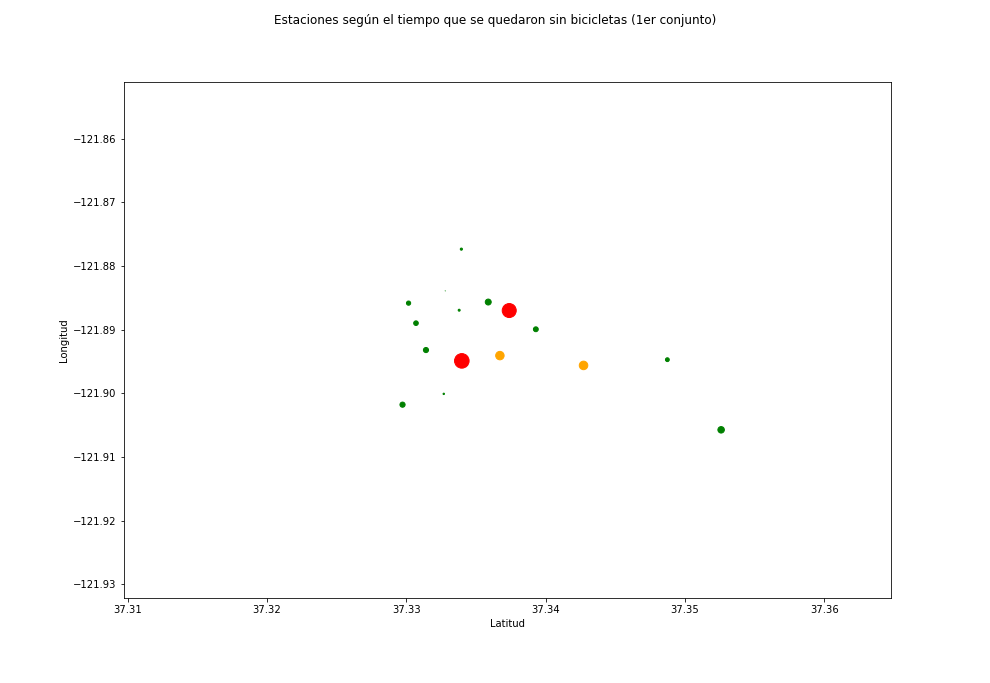

In [44]:
#grafico de todas las estaciones del primer conjunto

%matplotlib notebook

lat37 = station[station['lat'] < 37.37]
colors = ["" for x in range(lat37['cantidad_veces_cero_bikes_disponibles'].size)]
i = 0
for line in lat37['cantidad_veces_cero_bikes_disponibles']:
    if(int(line)/1000 < 3):
        colors[i] = 'green'
    elif((int(line)/1000 > 3) & (int(line)/1000 < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'red'
    i = i +1

plt.scatter(lat37['lat'], lat37['long'], s=lat37['cantidad_veces_cero_bikes_disponibles']/50, c = colors)
plt.suptitle("Estaciones según el tiempo que se quedaron sin bicicletas (1er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


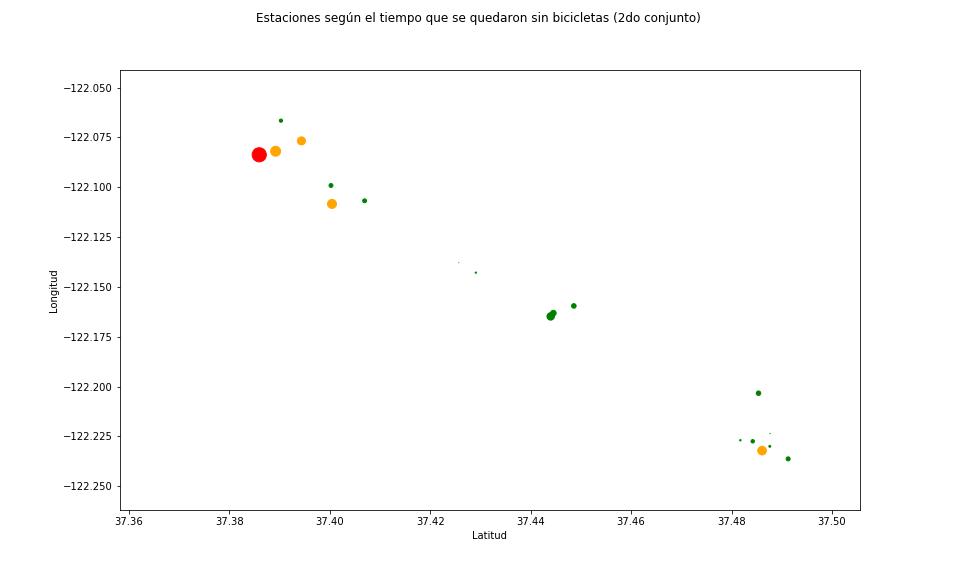

In [45]:
#grafico de todas las estaciones del segundo conjunto

%matplotlib notebook

lat36 = station[(station['lat'] > 37.37) & (station['lat'] < 37.75)]
colors = ["" for x in range(lat36['cantidad_veces_cero_bikes_disponibles'].size)]
i = 0
for line in lat36['cantidad_veces_cero_bikes_disponibles']:
    if(int(line)/1000 < 3):
        colors[i] = 'green'
    elif((int(line)/1000 > 3) & (int(line)/1000 < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'red'
    i = i +1
    
plt.scatter(lat36['lat'], lat36['long'], s=lat36['cantidad_veces_cero_bikes_disponibles']/50, c = colors)
plt.suptitle("Estaciones según el tiempo que se quedaron sin bicicletas (2do conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


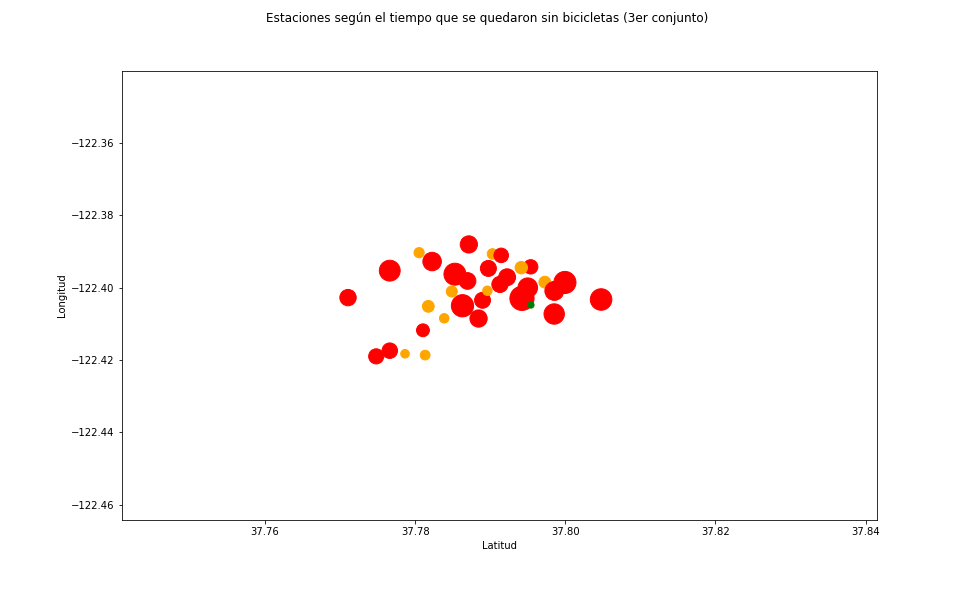

In [46]:
%matplotlib notebook

lat75 = station[station['lat'] > 37.75]
colors = ["" for x in range(lat75['cantidad_veces_cero_bikes_disponibles'].size)]
i = 0
for line in lat75['cantidad_veces_cero_bikes_disponibles']:
    if(int(line)/1000 < 3):
        colors[i] = 'green'
    elif((int(line)/1000 > 3) & (int(line)/1000 < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'red'
    i = i +1
    
plt.scatter(lat75['lat'], lat75['long'], s=lat75['cantidad_veces_cero_bikes_disponibles']/50, c = colors)
plt.suptitle("Estaciones según el tiempo que se quedaron sin bicicletas (3er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


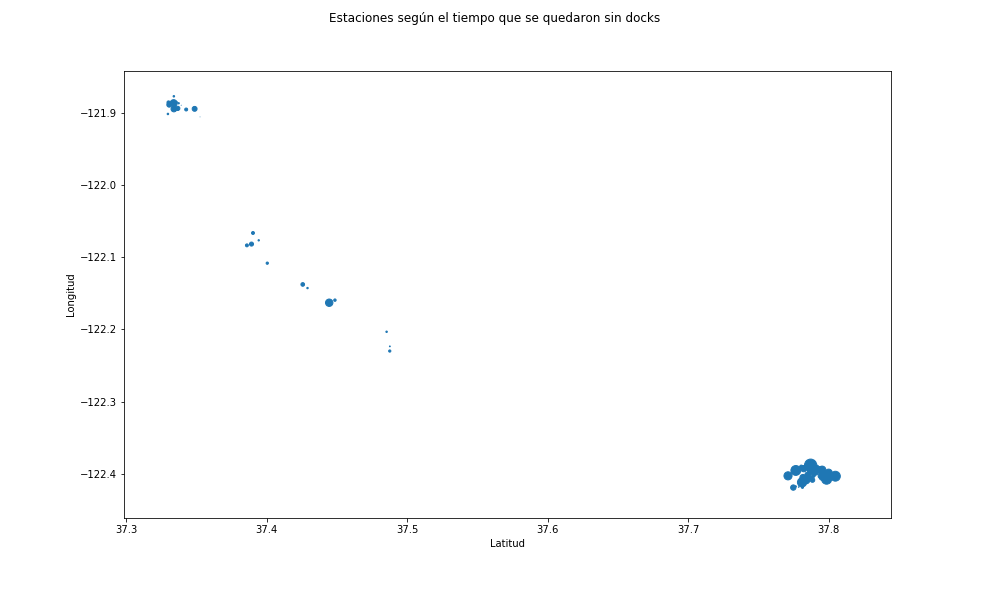

In [52]:
#grafico de todas las estaciones con radio segun la cantidad de veces que se quedaron sin docks

#falta emprolijarlos. agregar labels titulos

%matplotlib notebook

plt.scatter(station['lat'], station['long'], s=station['cantidad_veces_cero_docks_disponibles']/200)
plt.suptitle("Estaciones según el tiempo que se quedaron sin docks")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


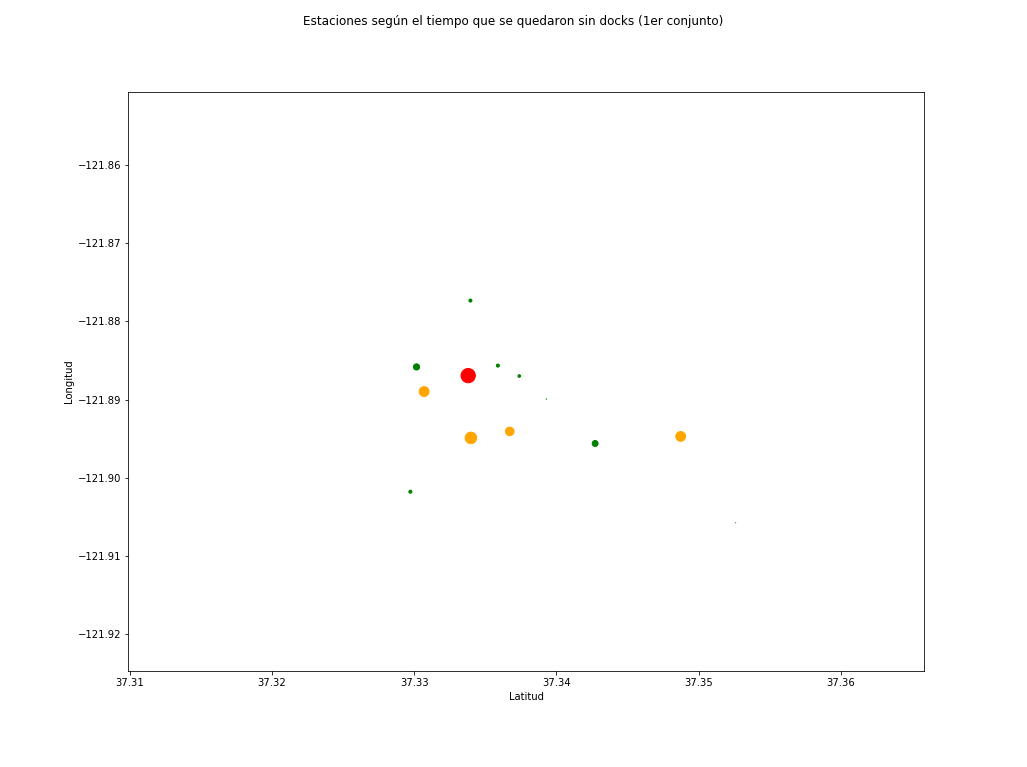

In [57]:
#grafico de todas las estaciones del primer conjunto

%matplotlib notebook

lat37 = station[station['lat'] < 37.37]
colors = ["" for x in range(lat37['cantidad_veces_cero_docks_disponibles'].size)]
i = 0
for line in lat37['cantidad_veces_cero_docks_disponibles']:
    if(int(line)/1000 < 3):
        colors[i] = 'green'
    elif((int(line)/1000 > 3) & (int(line)/1000 < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'red'
    i = i +1

plt.scatter(lat37['lat'], lat37['long'], s=lat37['cantidad_veces_cero_docks_disponibles']/50, c = colors)
plt.suptitle("Estaciones según el tiempo que se quedaron sin docks (1er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


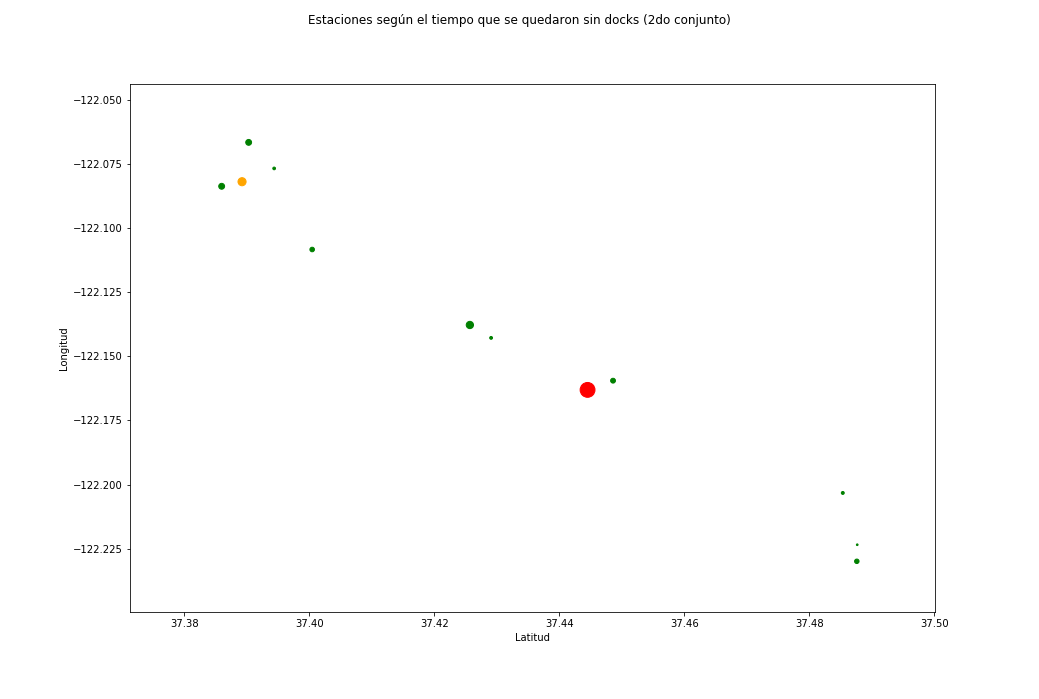

In [54]:
#grafico de todas las estaciones del segundo conjunto

%matplotlib notebook

lat36 = station[(station['lat'] > 37.37) & (station['lat'] < 37.75)]
colors = ["" for x in range(lat36['cantidad_veces_cero_docks_disponibles'].size)]
i = 0
for line in lat36['cantidad_veces_cero_docks_disponibles']:
    if(int(line)/1000 < 3):
        colors[i] = 'green'
    elif((int(line)/1000 > 3) & (int(line)/1000 < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'red'
    i = i +1
plt.scatter(lat36['lat'], lat36['long'], s=lat36['cantidad_veces_cero_docks_disponibles']/50, c = colors)
plt.suptitle("Estaciones según el tiempo que se quedaron sin docks (2do conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

<IPython.core.display.Javascript object>


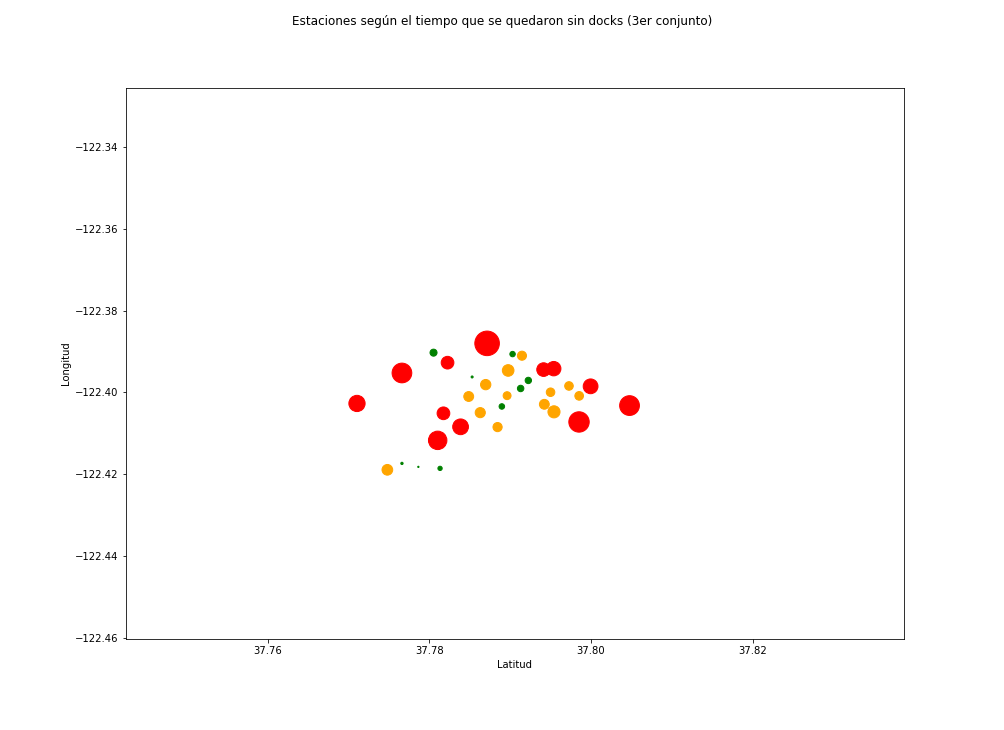

In [55]:
%matplotlib notebook

lat75 = station[station['lat'] > 37.75]
colors = ["" for x in range(lat75['cantidad_veces_cero_docks_disponibles'].size)]
i = 0
for line in lat75['cantidad_veces_cero_docks_disponibles']:
    if(int(line)/1000 < 3):
        colors[i] = 'green'
    elif((int(line)/1000 > 3) & (int(line)/1000 < 8)):
        colors[i] = 'orange'
    else:
        colors[i] = 'red'
    i = i +1

plt.scatter(lat75['lat'], lat75['long'], s=lat75['cantidad_veces_cero_docks_disponibles']/50, c = colors)
plt.suptitle("Estaciones según el tiempo que se quedaron sin docks (3er conjunto)")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

In [58]:
#ver dia y noche como afecta

#separamos la fecha por / y eliminamos todo lo q hay mas a la derecha del espacio despues del año
fechas = trip_train['start_date'].map(lambda x: (x.split('/')[0], x.split('/')[1], x.split('/')[2].split(' ')[0]))

horas = trip_train['start_date'].map(lambda x:x.split('/')[2].split(' ')[1].split(':')[0])
#convertimos cada tupla de año mes dia a dia de semana ylo guardamos en un nuevo campo 

fechas = fechas.map(lambda x: dt.date(int(x[2]),int(x[0]),int(x[1])).strftime("%m"))

i = 0
deNoche = [0] * fechas.size
for line in fechas:
    if(((int(line) < 4) & (int(line) > 0)) | ((int(line) > 9)&(int(line) < 13))):
        if((int(horas[i]) <18) & (int(horas[i]) > 7)):
            deNoche[i] = 0
        else:
            deNoche[i] = 1
    else:
        if((int(horas[i]) <20) & (int(horas[i]) > 6)):
            deNoche[i] = 0
        else:
            deNoche[i] = 1
    i = i + 1 
        
trip_train['deNoche'] = deNoche



In [59]:
#cantidad viajes de noche y dia
trip_train['deNoche'].value_counts()

0    451434
1     98527
Name: deNoche, dtype: int64

In [60]:
#duracion viajes de noche y dia


sum = 0
count = trip_train[trip_train['deNoche'] == 0]['duration'].count()
idx =  trip_train[trip_train['deNoche'] == 0]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['deNoche'] == 0]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioDia = sum / count

sum = 0
count = trip_train[trip_train['deNoche'] == 1]['duration'].count()
idx =  trip_train[trip_train['deNoche'] == 1]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['deNoche'] == 1]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioNoche = sum / count


print (promedioDia)
print (promedioNoche)

1093.64407643
1204.0039989


In [61]:
#duracion viajes de dia en dias de semana

sum = 0
count = trip_train[(trip_train['weekday'] == 'Monday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Monday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Monday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioLunesDia = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Tuesday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Tuesday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Tuesday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMartesDia = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Wednesday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Wednesday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Wednesday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMiercolesDia = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Thursday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Thursday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Thursday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioJuevesDia = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Friday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Friday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Friday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioViernesDia = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Saturday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Saturday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Saturday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSabadoDia = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Sunday') & (trip_train['deNoche'] == 0)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Sunday') & (trip_train['deNoche'] == 0)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Sunday') & (trip_train['deNoche'] == 0)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioDomingoDia = sum / count




#duracion viajes de noche en dias de semana

sum = 0
count = trip_train[(trip_train['weekday'] == 'Monday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Monday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Monday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioLunesNoche = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Tuesday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Tuesday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Tuesday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMartesNoche = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Wednesday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Wednesday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Wednesday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioMiercolesNoche = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Thursday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Thursday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Thursday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioJuevesNoche = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Friday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Friday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Friday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioViernesNoche = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Saturday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Saturday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Saturday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSabadoNoche = sum / count

sum = 0
count = trip_train[(trip_train['weekday'] == 'Sunday') & (trip_train['deNoche'] == 1)]['duration'].count()
idx =  trip_train[(trip_train['weekday'] == 'Sunday') & (trip_train['deNoche'] == 1)]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[(trip_train['weekday'] == 'Sunday') & (trip_train['deNoche'] == 1)]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioDomingoNoche = sum / count

<IPython.core.display.Javascript object>


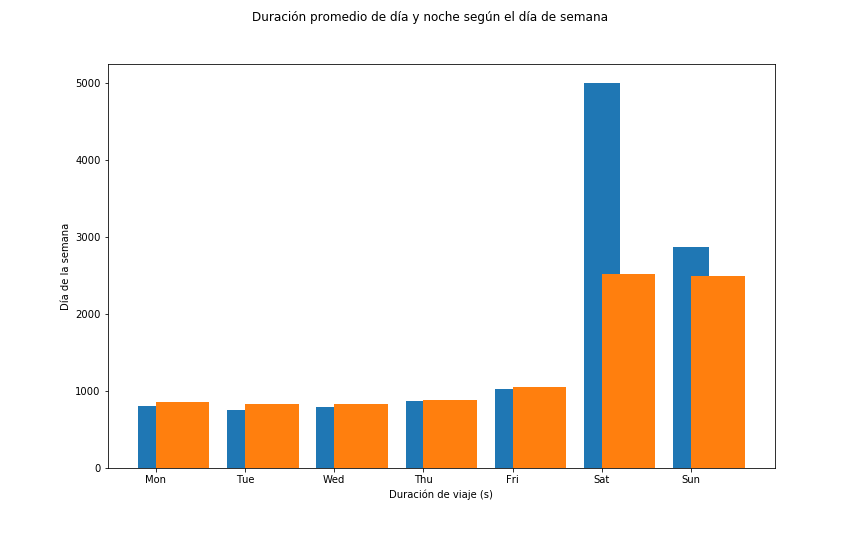

In [73]:
%matplotlib notebook
promediosDias = [promedioLunesDia, promedioMartesDia, promedioMiercolesDia, promedioJuevesDia, promedioViernesDia, promedioSabadoDia, promedioDomingoDia]
promediosNoches = [promedioLunesNoche, promedioMartesNoche, promedioMiercolesNoche, promedioJuevesNoche, promedioViernesNoche, promedioSabadoNoche, promedioDomingoNoche]

number = [0,1,2,3,4,5,6]
dias = [ 'Mon', 'Tue', 'Wed', 'Thu','Fri', 'Sat', 'Sun']
plt.bar(number, promediosNoches, width = 0.4)
plt.bar(number, promediosDias, width = 0.6, align = 'edge')
plt.suptitle("Duración promedio de día y noche según el día de semana")
plt.xlabel("Duración de viaje (s)")
plt.ylabel("Día de la semana")
plt.xticks(number, dias)
plt.show()

In [63]:
#analizar segun las estaciones del año



#separamos la fecha por / y eliminamos todo lo q hay mas a la derecha del espacio despues del año
fechas = trip_train['start_date'].map(lambda x: (x.split('/')[0], x.split('/')[1], x.split('/')[2].split(' ')[0]))

fechas = fechas.map(lambda x: dt.date(int(x[2]),int(x[0]),int(x[1])).strftime("%m%d"))

i = 0
estacion = [0] * fechas.size
for line in fechas:
    if((int(line) < 621) & (int(line) >= 321)):
        estacion[i] = 0
    elif((int(line) < 921) & (int(line) >= 621)):
        estacion[i] = 1
    elif((int(line) < 1221) & (int(line) >= 921)):
        estacion[i] = 2
    else:
        estacion[i] = 3
    i = i + 1 
        
trip_train['estacion'] = estacion

In [64]:
sum = 0
count = trip_train[trip_train['estacion'] == 0]['duration'].count()
idx =  trip_train[trip_train['estacion'] == 0]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['estacion'] == 0]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSpring = sum / count

sum = 0
count = trip_train[trip_train['estacion'] == 1]['duration'].count()
idx =  trip_train[trip_train['estacion'] == 1]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['estacion'] == 1]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioSummer = sum / count

sum = 0
count = trip_train[trip_train['estacion'] == 2]['duration'].count()
idx =  trip_train[trip_train['estacion'] == 2]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['estacion'] == 2]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioAutumn = sum / count

sum = 0
count = trip_train[trip_train['estacion'] == 3]['duration'].count()
idx =  trip_train[trip_train['estacion'] == 3]['duration'].value_counts().index.tolist()
i = 0
durations = trip_train[trip_train['estacion'] == 3]['duration'].value_counts()
for duration in durations:
    sum += idx[i] * duration
    i += 1
promedioWinter = sum / count

In [65]:
#cantidad viajes 

print(trip_train[trip_train['estacion'] == 0]['duration'].count())
print(trip_train[trip_train['estacion'] == 1]['duration'].count())
print(trip_train[trip_train['estacion'] == 2]['duration'].count())
print(trip_train[trip_train['estacion'] == 3]['duration'].count())

144954
153298
132886
118823


<IPython.core.display.Javascript object>


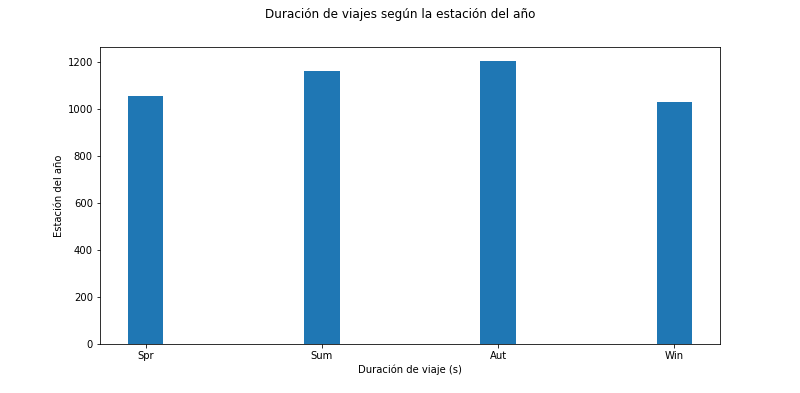

In [70]:
%matplotlib notebook

promediosEstaciones = [promedioSpring, promedioSummer, promedioAutumn, promedioWinter]

number = [0,1,2,3]
estacionesDelAnio = [ 'Spr', 'Sum', 'Aut', 'Win']
plt.bar(number, promediosEstaciones, width = 0.2)
plt.suptitle("Duración de viajes según la estación del año")
plt.xlabel("Duración de viaje (s)")
plt.ylabel("Estación del año")
plt.xticks(number, estacionesDelAnio)
plt.show()

In [6]:
#averiguamos la cantidad de alquiler de bicis por estacion
alquiler_de_bicis_por_estacion = pd.DataFrame({'alquiler_de_bicis_por_estacion' : trip_train['start_station_name'].value_counts()})
alquiler_de_bicis_por_estacion

,alquiler_de_bicis_por_estacion
San Francisco Caltrain (Townsend at 4th),40237
San Francisco Caltrain 2 (330 Townsend),27666
Harry Bridges Plaza (Ferry Building),26947
Embarcadero at Sansome,22759
Temporary Transbay Terminal (Howard at Beale),21478
2nd at Townsend,21210
Steuart at Market,20335
Market at Sansome,19762
Townsend at 7th,19451
Market at 10th,16603


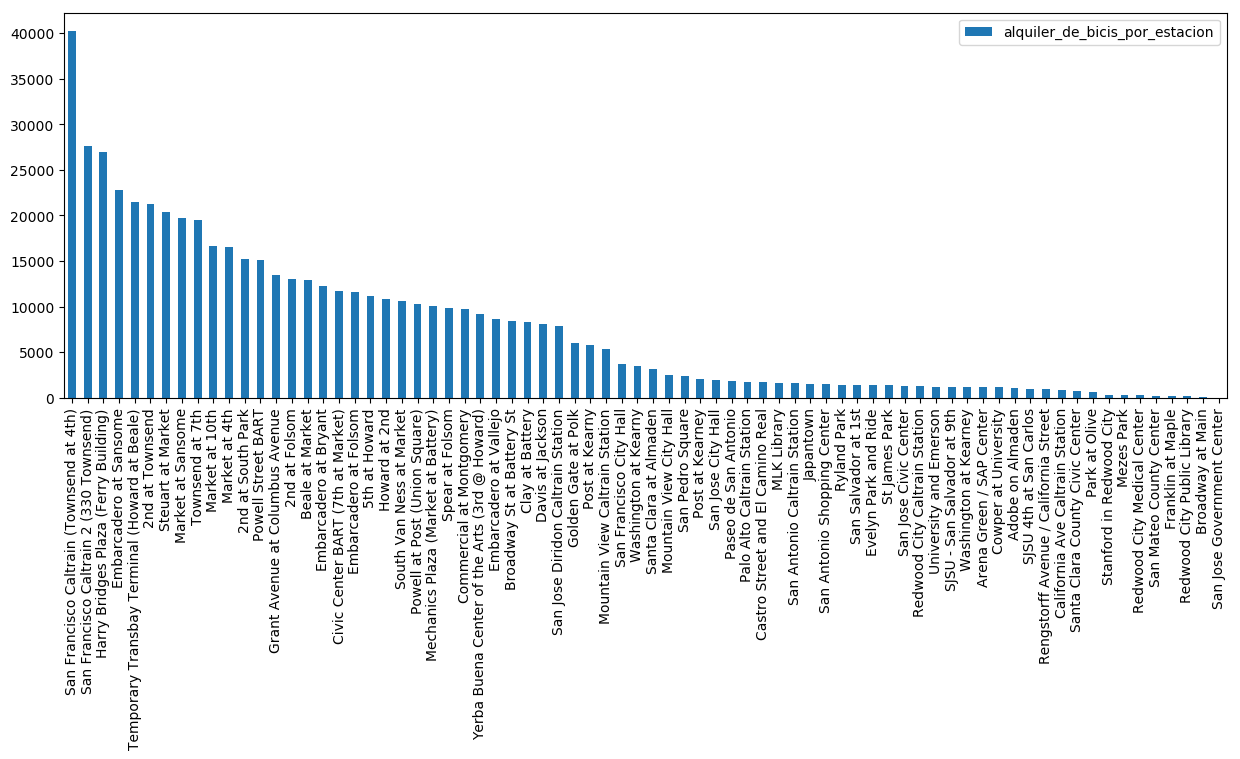

In [7]:
#graficamos
alquiler_de_bicis_por_estacion.plot(kind='bar')

In [9]:
#viajes entre estaciones
viajes_entre_estaciones = trip_train[['start_station_name','end_station_name','duration']]
viajes_entre_estaciones

,start_station_name,end_station_name,duration
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,396
1,Market at 10th,Washington at Kearny,636
2,Market at Sansome,2nd at Folsom,334
3,San Francisco Caltrain 2 (330 Townsend),Temporary Transbay Terminal (Howard at Beale),666
4,Market at 10th,Powell Street BART,318
5,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),337
6,2nd at South Park,2nd at Townsend,394
7,Powell at Post (Union Square),San Francisco Caltrain (Townsend at 4th),766
8,2nd at Folsom,San Francisco Caltrain (Townsend at 4th),531
9,Market at 4th,Mechanics Plaza (Market at Battery),267


In [11]:
#tiempo total de los viajes realziados entre las estaciones a,b
duracion_de_viaje_entre_estaciones = viajes_entre_estaciones.groupby(['start_station_name', 'end_station_name']).sum().sort_values(by = 'duration',ascending= False)
duracion_de_viaje_entre_estaciones

,,duration
start_station_name,end_station_name,
South Van Ness at Market,2nd at Folsom,17348497
Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),8957008
Embarcadero at Sansome,Embarcadero at Sansome,7612985
University and Emerson,University and Emerson,7432084
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6354034
Powell at Post (Union Square),Powell at Post (Union Square),5121601
Market at 4th,Market at 4th,4797817
Powell Street BART,Powell Street BART,4754049
San Jose Civic Center,San Jose Civic Center,3651827


In [12]:
estacion_como_inicio = pd.DataFrame({'cantidad_de_veces_como_inicio' : trip_train['start_station_name'].value_counts()}).reset_index().rename(columns={'index': 'estacion'})
estacion_como_inicio

,estacion,cantidad_de_veces_como_inicio
0,San Francisco Caltrain (Townsend at 4th),40237
1,San Francisco Caltrain 2 (330 Townsend),27666
2,Harry Bridges Plaza (Ferry Building),26947
3,Embarcadero at Sansome,22759
4,Temporary Transbay Terminal (Howard at Beale),21478
5,2nd at Townsend,21210
6,Steuart at Market,20335
7,Market at Sansome,19762
8,Townsend at 7th,19451
9,Market at 10th,16603


In [13]:
estacion_como_final = pd.DataFrame({'cantidad_de_veces_como_final' : trip_train['end_station_name'].value_counts()}).reset_index().rename(columns={'index': 'estacion'})
estacion_como_final

,estacion,cantidad_de_veces_como_final
0,San Francisco Caltrain (Townsend at 4th),51842
1,San Francisco Caltrain 2 (330 Townsend),28709
2,Harry Bridges Plaza (Ferry Building),27348
3,Embarcadero at Sansome,25229
4,2nd at Townsend,23411
5,Market at Sansome,23109
6,Townsend at 7th,21989
7,Steuart at Market,20530
8,Temporary Transbay Terminal (Howard at Beale),18978
9,Market at 4th,16355


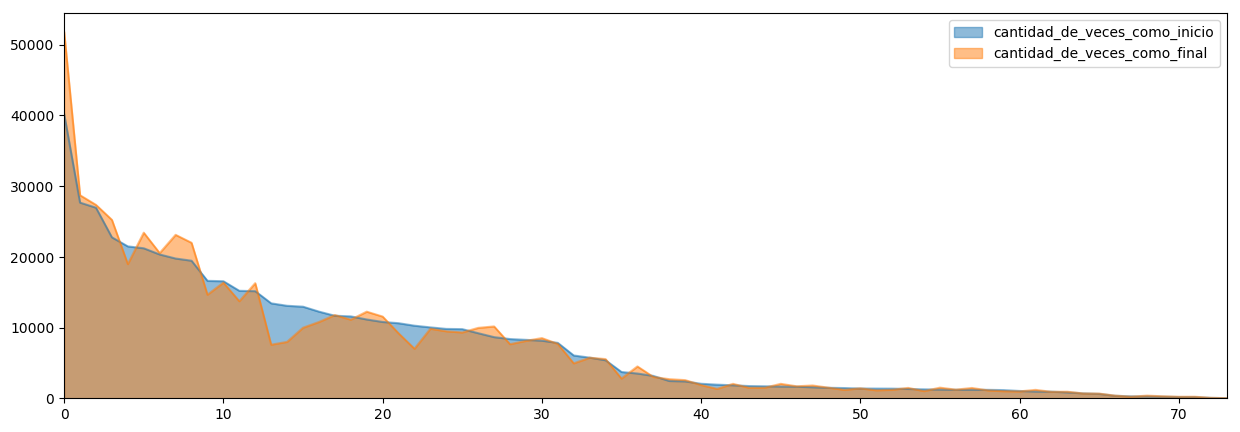

In [14]:
usos_de_estacion = pd.merge(estacion_como_inicio, estacion_como_final, on='estacion')
usos_de_estacion.plot(kind="area", stacked=False)

In [15]:
usos_de_estacion

,estacion,cantidad_de_veces_como_inicio,cantidad_de_veces_como_final
0,San Francisco Caltrain (Townsend at 4th),40237,51842
1,San Francisco Caltrain 2 (330 Townsend),27666,28709
2,Harry Bridges Plaza (Ferry Building),26947,27348
3,Embarcadero at Sansome,22759,25229
4,Temporary Transbay Terminal (Howard at Beale),21478,18978
5,2nd at Townsend,21210,23411
6,Steuart at Market,20335,20530
7,Market at Sansome,19762,23109
8,Townsend at 7th,19451,21989
9,Market at 10th,16603,14647


In [17]:

usos_de_estacion['usos_de_estacion'] = usos_de_estacion['cantidad_de_veces_como_inicio'] + usos_de_estacion['cantidad_de_veces_como_final']
usos_de_estacion.sort_values(by = 'usos_de_estacion', ascending = False)

,estacion,cantidad_de_veces_como_inicio,cantidad_de_veces_como_final,usos_de_estacion
0,San Francisco Caltrain (Townsend at 4th),40237,51842,92079
1,San Francisco Caltrain 2 (330 Townsend),27666,28709,56375
2,Harry Bridges Plaza (Ferry Building),26947,27348,54295
3,Embarcadero at Sansome,22759,25229,47988
5,2nd at Townsend,21210,23411,44621
7,Market at Sansome,19762,23109,42871
8,Townsend at 7th,19451,21989,41440
6,Steuart at Market,20335,20530,40865
4,Temporary Transbay Terminal (Howard at Beale),21478,18978,40456
10,Market at 4th,16552,16355,32907


In [30]:
#Veamos ahora si la cantidad de bicis que llegan y salen de las estaciones varía según las condiciones del clima
#Veamos qué sucede cuando las temperaturas son elevadas (mayores a 25 grados C)
weather['date'] = pd.to_datetime(weather['date'])
weather['date_without_time'] = weather.date.dt.date
trip_train['start_date'] = pd.to_datetime(trip_train['start_date'])
trip_train['start_date_without_time'] = trip_train.start_date.dt.date
high_temps = weather[(weather['max_temperature_f']>77) & (weather['max_temperature_f']<102)]
trip_train.set_index('start_date_without_time')
high_temps.set_index('date_without_time')
high_temps_trip_train = pd.merge(high_temps,trip_train,how='inner',left_index=True, right_index=True)

In [32]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de altas temperaturas
high_temps_trip_train['start_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         52
San Francisco Caltrain 2 (330 Townsend)          45
Harry Bridges Plaza (Ferry Building)             39
Embarcadero at Sansome                           35
Townsend at 7th                                  33
Steuart at Market                                30
Market at Sansome                                30
Grant Avenue at Columbus Avenue                  29
2nd at Townsend                                  29
Temporary Transbay Terminal (Howard at Beale)    27
Market at 4th                                    27
Powell Street BART                               26
Embarcadero at Folsom                            20
Beale at Market                                  17
2nd at Folsom                                    17
2nd at South Park                                17
Embarcadero at Vallejo                           16
Civic Center BART (7th at Market)                15
Market at 10th                                   15
Embarcadero 

<IPython.core.display.Javascript object>


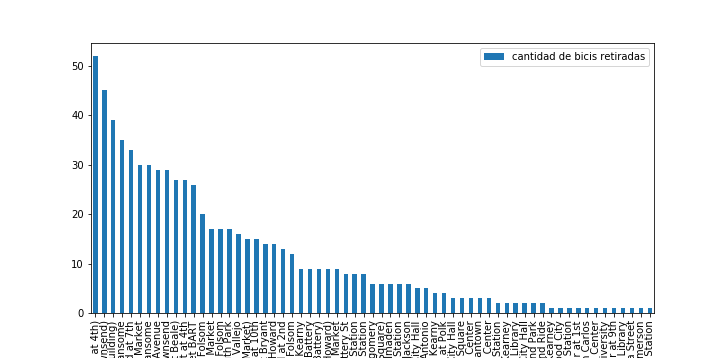

In [63]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de altas temperaturas (mayor a 25 grados C)
high_temps_bikes_take_out = pd.DataFrame({'cantidad de bicis retiradas en altas temperaturas' : high_temps_trip_train['start_station_name'].value_counts()}) 
high_temps_bikes_take_out.plot(kind='bar')

In [34]:
#Estaciones donde se dejaron mayor cantidad de bicis los días de altas temperaturas
high_temps_trip_train['end_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         66
Townsend at 7th                                  40
Embarcadero at Sansome                           35
Steuart at Market                                33
San Francisco Caltrain 2 (330 Townsend)          32
Harry Bridges Plaza (Ferry Building)             31
Market at Sansome                                30
Temporary Transbay Terminal (Howard at Beale)    29
2nd at Townsend                                  27
Powell Street BART                               25
Embarcadero at Folsom                            18
Mechanics Plaza (Market at Battery)              17
Davis at Jackson                                 17
Market at 10th                                   17
South Van Ness at Market                         16
2nd at Folsom                                    15
2nd at South Park                                15
5th at Howard                                    15
Civic Center BART (7th at Market)                15
Beale at Mar

<IPython.core.display.Javascript object>


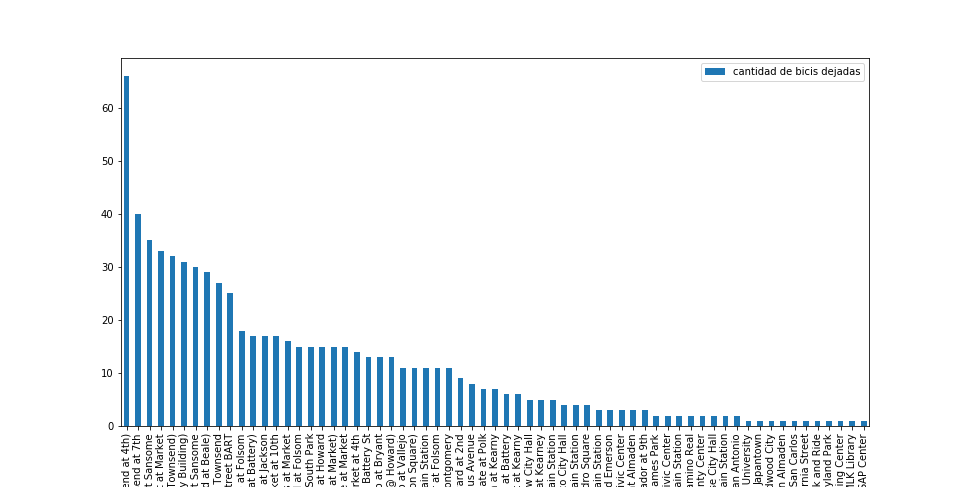

In [64]:
#Estaciones donde se dejaron mayor cantidad de bicis los días de altas temperaturas
high_temps_bikes_drop_off = pd.DataFrame({'cantidad de bicis dejadas en altas temperaturas' : high_temps_trip_train['end_station_name'].value_counts()}) 
high_temps_bikes_drop_off.plot(kind='bar')

In [36]:
#Veamos qué sucede cuando las temperaturas son bajas (menor a 25 grados)
low_temps = weather[(weather['max_temperature_f']<77)]
low_temps.set_index('date_without_time')
low_temps_trip_train = pd.merge(low_temps,trip_train,how='inner',left_index=True, right_index=True)
low_temps_trip_train

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_y,start_date_without_time
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,2015-08-27 08:36:00,Harry Bridges Plaza (Ferry Building),50,8/27/2015 8:43,Embarcadero at Sansome,60,187,Subscriber,94602,2015-08-27
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,2014-06-09 08:42:00,Market at Sansome,77,6/9/2014 8:47,2nd at Folsom,62,281,Subscriber,94107,2014-06-09
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,2015-01-26 16:55:00,San Francisco Caltrain 2 (330 Townsend),69,1/26/2015 17:07,Temporary Transbay Terminal (Howard at Beale),55,634,Subscriber,94602,2015-01-26
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,2015-08-29 15:09:00,Market at 10th,67,8/29/2015 15:14,Powell Street BART,39,607,Subscriber,94709,2015-08-29
5,2013-09-03,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,2014-10-30 07:00:00,Townsend at 7th,65,10/30/2014 7:06,San Francisco Caltrain (Townsend at 4th),70,370,Subscriber,94107,2014-10-30
6,2013-09-04,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,2015-08-07 17:11:00,2nd at South Park,64,8/7/2015 17:17,2nd at Townsend,61,443,Subscriber,94107,2015-08-07
7,2013-09-05,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,2014-10-08 14:10:00,Powell at Post (Union Square),71,10/8/2014 14:23,San Francisco Caltrain (Townsend at 4th),70,485,Subscriber,94107,2014-10-08
10,2013-09-08,74.0,65.0,56.0,58.0,54.0,52.0,86.0,70.0,53.0,...,2014-05-20 08:59:00,San Francisco Caltrain (Townsend at 4th),70,5/20/2014 9:12,Market at 10th,67,528,Subscriber,95112,2014-05-20
11,2013-09-09,76.0,66.0,55.0,58.0,55.0,52.0,90.0,70.0,50.0,...,2014-06-20 11:32:00,Market at Sansome,77,6/20/2014 11:39,Civic Center BART (7th at Market),72,284,Subscriber,94960,2014-06-20
12,2013-09-10,74.0,66.0,57.0,59.0,56.0,54.0,93.0,73.0,53.0,...,2014-08-30 14:44:00,Harry Bridges Plaza (Ferry Building),50,8/30/2014 15:52,Embarcadero at Folsom,51,659,Customer,94952,2014-08-30


In [37]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de temperaturas bajas
low_temps_trip_train['start_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         188
San Francisco Caltrain 2 (330 Townsend)          151
Harry Bridges Plaza (Ferry Building)             131
Townsend at 7th                                  116
Steuart at Market                                110
2nd at Townsend                                  108
Temporary Transbay Terminal (Howard at Beale)    107
Embarcadero at Sansome                            97
Market at Sansome                                 93
Market at 10th                                    90
Market at 4th                                     84
2nd at South Park                                 81
Beale at Market                                   76
Embarcadero at Folsom                             69
2nd at Folsom                                     66
Powell Street BART                                63
Grant Avenue at Columbus Avenue                   63
5th at Howard                                     59
Powell at Post (Union Square)                 

<IPython.core.display.Javascript object>


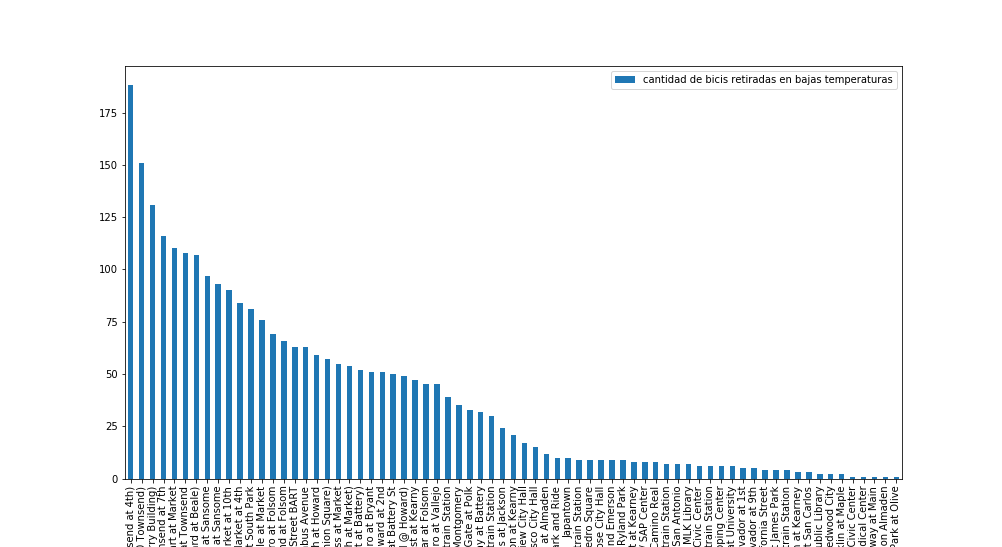

In [71]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de temperaturas bajas
low_temps_bikes_take_out = pd.DataFrame({'cantidad de bicis retiradas en bajas temperaturas' : low_temps_trip_train['start_station_name'].value_counts()}) 
low_temps_bikes_take_out.plot(kind='bar')

In [39]:
#Estaciones donde se dejaron mayor cantidad de bicis los días de temperaturas bajas
low_temps_trip_train['end_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         254
Harry Bridges Plaza (Ferry Building)             141
San Francisco Caltrain 2 (330 Townsend)          132
Embarcadero at Sansome                           132
Market at Sansome                                124
2nd at Townsend                                  119
Steuart at Market                                106
Temporary Transbay Terminal (Howard at Beale)    100
Townsend at 7th                                   95
Powell Street BART                                86
Market at 4th                                     85
Market at 10th                                    75
5th at Howard                                     67
2nd at South Park                                 64
Civic Center BART (7th at Market)                 62
Yerba Buena Center of the Arts (3rd @ Howard)     59
Mechanics Plaza (Market at Battery)               57
Spear at Folsom                                   53
Embarcadero at Folsom                         

<IPython.core.display.Javascript object>


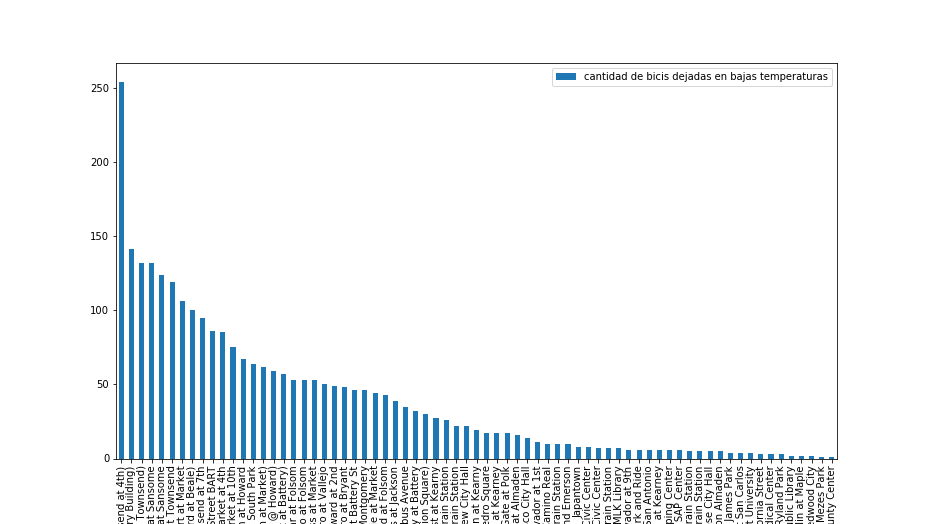

In [70]:
#Estaciones donde se dejaron mayor cantidad de bicis los días de temperaturas bajas
low_temps_bikes_drop_off = pd.DataFrame({'cantidad de bicis dejadas en bajas temperaturas' : low_temps_trip_train['end_station_name'].value_counts()}) 
low_temps_bikes_drop_off.plot(kind='bar')

In [41]:
#Analicemos ahora para los días en los que hubo lluvias y en los que no llovió
#Veamos cuales son las estaciones con mayor movimiento de bicis dada esta condición climática
weather['precipitation_inches']=pd.to_numeric(weather['precipitation_inches'], errors='coerce')
rainy_weather = weather[(weather['precipitation_inches'] > 0) ]
rainy_weather.set_index('date_without_time')
rain_trip_train = pd.merge(rainy_weather,trip_train,how='inner',left_index=True, right_index=True)

In [42]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de lluvias
rain_trip_train['start_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         24
San Francisco Caltrain 2 (330 Townsend)          17
Embarcadero at Folsom                            15
2nd at Townsend                                  14
2nd at South Park                                13
Market at Sansome                                11
Steuart at Market                                11
Embarcadero at Sansome                           11
Market at 4th                                    10
Townsend at 7th                                   9
Powell at Post (Union Square)                     8
Beale at Market                                   8
2nd at Folsom                                     8
5th at Howard                                     8
Powell Street BART                                7
Harry Bridges Plaza (Ferry Building)              7
Market at 10th                                    7
Commercial at Montgomery                          6
Clay at Battery                                   6
Grant Avenue

<IPython.core.display.Javascript object>


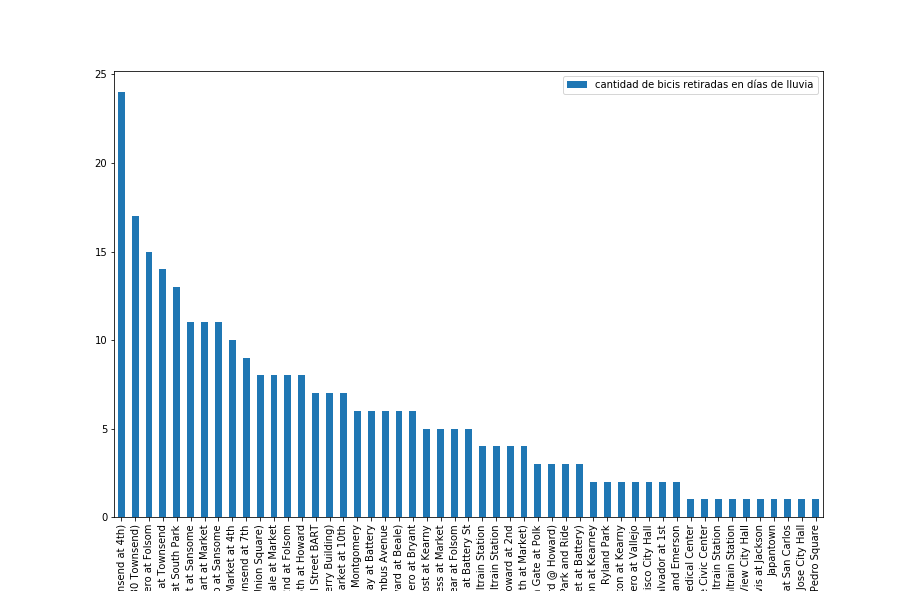

In [69]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de lluvias
rain_trip_train_bikes_take_out = pd.DataFrame({'cantidad de bicis retiradas en días de lluvia' : rain_trip_train['start_station_name'].value_counts()}) 
rain_trip_train_bikes_take_out.plot(kind='bar')

In [44]:
#Estaciones donde se dejaron mayor cantidad de bicis los días sin lluvias
rain_trip_train['end_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         27
Harry Bridges Plaza (Ferry Building)             20
San Francisco Caltrain 2 (330 Townsend)          15
Market at Sansome                                14
Embarcadero at Sansome                           14
Steuart at Market                                13
Market at 4th                                    13
2nd at Townsend                                  11
Townsend at 7th                                  10
Market at 10th                                   10
Temporary Transbay Terminal (Howard at Beale)     8
Davis at Jackson                                  7
Howard at 2nd                                     7
2nd at South Park                                 7
Commercial at Montgomery                          7
Embarcadero at Folsom                             7
Broadway St at Battery St                         6
Embarcadero at Bryant                             5
Spear at Folsom                                   5
5th at Howar

<IPython.core.display.Javascript object>


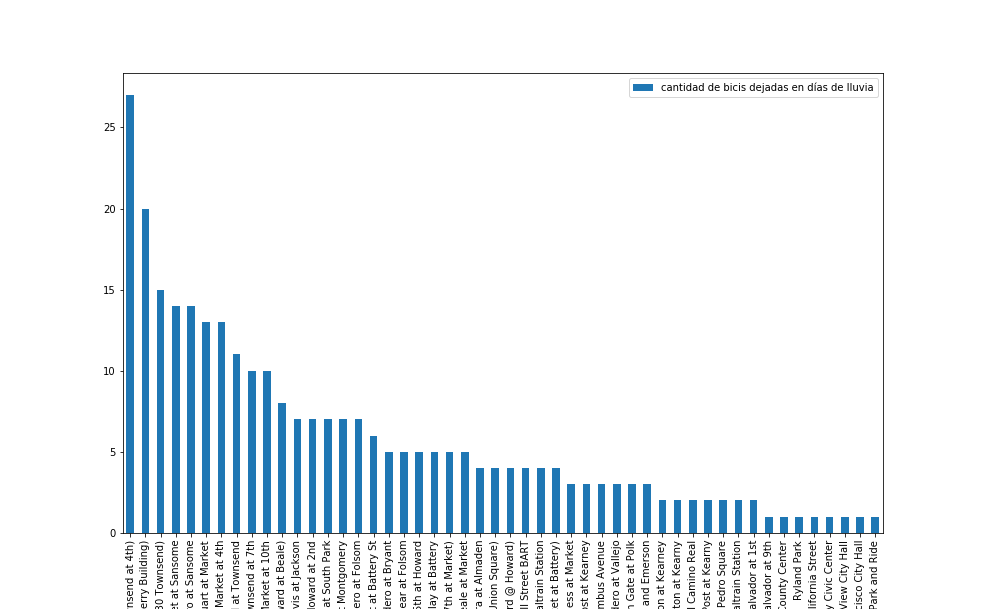

In [75]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de lluvias

rain_trip_train_bikes_drop_off = pd.DataFrame({'cantidad de bicis dejadas en días de lluvia' : rain_trip_train['end_station_name'].value_counts()}) 
rain_trip_train_bikes_drop_off.plot(kind='bar')

In [46]:
#Datos sin lluvia
#Veamos cuales son las estaciones con mayor movimiento de bicis 
no_rain_weather = weather[(weather['precipitation_inches'] == 0) ]
no_rain_weather.set_index('date_without_time')
no_rain_trip_train = pd.merge(rainy_weather,trip_train,how='inner',left_index=True, right_index=True)

In [47]:
#Estaciones donde se retiraron mayor cantidad de bicis los días sin lluvias
no_rain_trip_train['start_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         24
San Francisco Caltrain 2 (330 Townsend)          17
Embarcadero at Folsom                            15
2nd at Townsend                                  14
2nd at South Park                                13
Market at Sansome                                11
Steuart at Market                                11
Embarcadero at Sansome                           11
Market at 4th                                    10
Townsend at 7th                                   9
Powell at Post (Union Square)                     8
Beale at Market                                   8
2nd at Folsom                                     8
5th at Howard                                     8
Powell Street BART                                7
Harry Bridges Plaza (Ferry Building)              7
Market at 10th                                    7
Commercial at Montgomery                          6
Clay at Battery                                   6
Grant Avenue

<IPython.core.display.Javascript object>


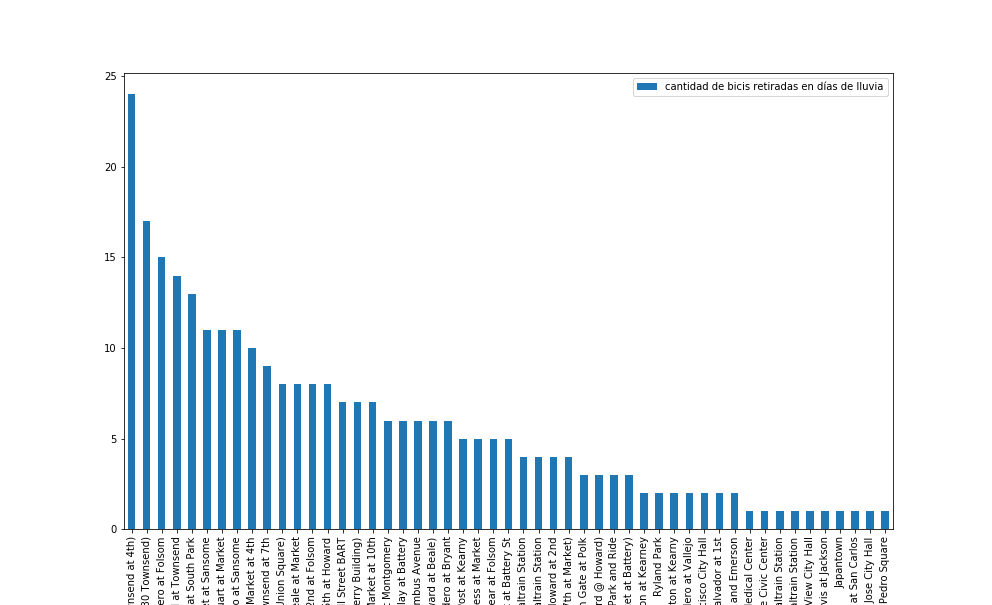

In [76]:
#Estaciones donde se retiraron mayor cantidad de bicis los días de lluvias

no_rain_trip_train_bikes_take_out = pd.DataFrame({'cantidad de bicis retiradas en días de lluvia' : no_rain_trip_train['start_station_name'].value_counts()}) 
no_rain_trip_train_bikes_take_out.plot(kind='bar')

In [49]:
#Estaciones donde se dejaron mayor cantidad de bicis los días sin lluvias
no_rain_trip_train['end_station_name'].value_counts()

San Francisco Caltrain (Townsend at 4th)         27
Harry Bridges Plaza (Ferry Building)             20
San Francisco Caltrain 2 (330 Townsend)          15
Market at Sansome                                14
Embarcadero at Sansome                           14
Steuart at Market                                13
Market at 4th                                    13
2nd at Townsend                                  11
Townsend at 7th                                  10
Market at 10th                                   10
Temporary Transbay Terminal (Howard at Beale)     8
Davis at Jackson                                  7
Howard at 2nd                                     7
2nd at South Park                                 7
Commercial at Montgomery                          7
Embarcadero at Folsom                             7
Broadway St at Battery St                         6
Embarcadero at Bryant                             5
Spear at Folsom                                   5
5th at Howar

<IPython.core.display.Javascript object>


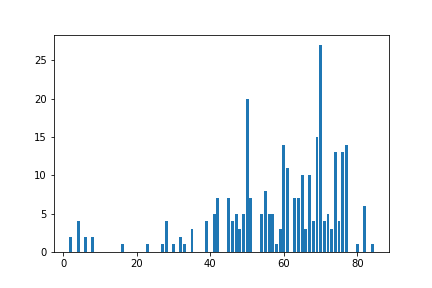

<IPython.core.display.Javascript object>


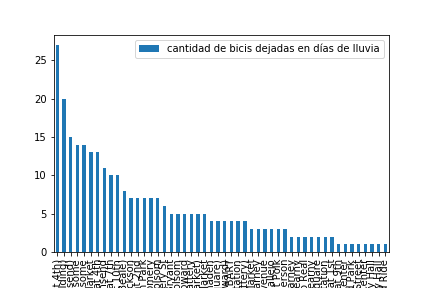

In [84]:
#Estaciones donde se dejaronmayor cantidad de bicis los días de lluvias
%matplotlib notebook
no_rain_trip_train_bikes_drop_off = no_rain_trip_train['end_station_id'].value_counts()
plt.bar(no_rain_trip_train_bikes_drop_off.keys(),no_rain_trip_train_bikes_drop_off.values)
plt.show()

no_rain_trip_train_bikes_drop_of = pd.DataFrame({'cantidad de bicis dejadas en días de lluvia' : no_rain_trip_train['end_station_name'].value_counts()}) 
no_rain_trip_train_bikes_drop_of.plot(kind='bar')